In [1]:
import pandas as pd
df1=pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable1.dta')
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


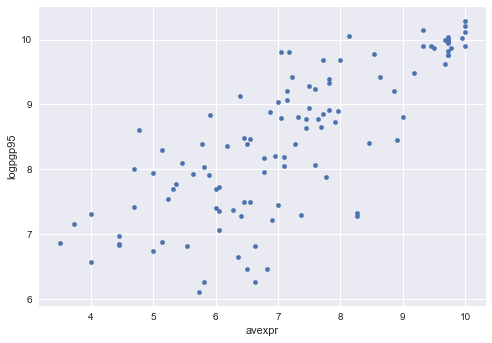

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('seaborn')
df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.show()

In [3]:
import numpy as np
# Dropping NA's is required to use numpy's polyfit
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr']) # Use only 'base sample' for plotting purposes
df1_subset = df1_subset[df1_subset.baseco == 1]
X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

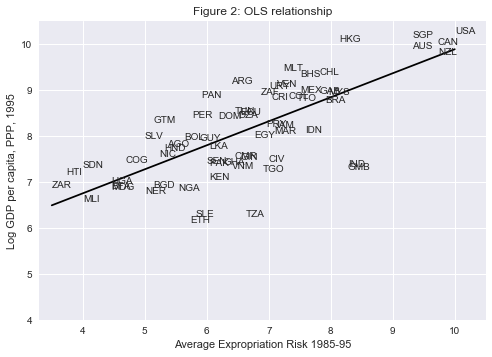

In [4]:
# Replace markers with country labels
fig, ax = plt.subplots()
# ax.scatter(X, y)
for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))
    # Fit a linear trend line
ax.plot(np.unique(X), np.poly1d(np.polyfit(X, y, 1))(np.unique(X)), color='black')
ax.set_xlim([3.3,10.5])
ax.set_ylim([4,10.5])
ax.set_xlabel('Average Expropriation Risk 1985-95')
ax.set_ylabel('Log GDP per capita, PPP, 1995')
ax.set_title("Figure 2: OLS relationship")
plt.show()

In [8]:
import statsmodels.api as sm
df1_subset['const'] = 1
reg1 = sm.OLS(df1_subset['logpgp95'], df1_subset[['const', 'avexpr']])
type(reg1)

statsmodels.regression.linear_model.OLS

In [9]:
results = reg1.fit() 
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     72.82
Date:                Fri, 09 Aug 2019   Prob (F-statistic):           4.72e-12
Time:                        09:10:25   Log-Likelihood:                -68.168
No. Observations:                  64   AIC:                             140.3
Df Residuals:                      62   BIC:                             144.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6604      0.409     11.408      0.0

In [11]:
mean_expr = np.mean(df1_subset['avexpr']) 
mean_expr

6.515625

In [12]:
results.predict([1,mean_expr])

array([ 8.06223691])

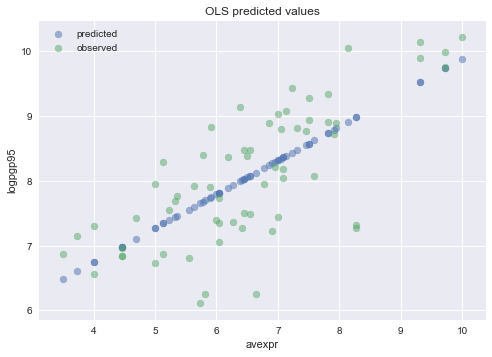

In [15]:
# Drop missing observations from whole sample
df1_plot = df1_subset.dropna(subset=['logpgp95', 'avexpr'])
# Plot predicted values
fix, ax = plt.subplots()
ax.scatter(df1_plot['avexpr'], results.predict(), alpha=0.5,label='predicted')
# Plot observed values
ax.scatter(df1_plot['avexpr'], df1_plot['logpgp95'], alpha=0.5, label='observed')
ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('avexpr')
ax.set_ylabel('logpgp95')
plt.show()

In [16]:
#Consider Endogeneity

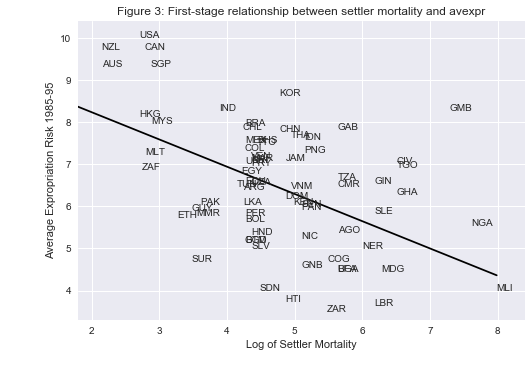

In [17]:
df1_subset2 = df1.dropna(subset=['logem4', 'avexpr'])
X = df1_subset2['logem4']
y = df1_subset2['avexpr']
labels = df1_subset2['shortnam']
# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='')
for i, label in enumerate(labels):
    ax.annotate(label, (X.iloc[i], y.iloc[i]))
# Fit a linear trend line
ax.plot(np.unique(X),np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),color='black')
ax.set_xlim([1.8,8.4])
ax.set_ylim([3.3,10.4])
ax.set_xlabel('Log of Settler Mortality')
ax.set_ylabel('Average Expropriation Risk 1985-95')
ax.set_title('Figure 3: First-stage relationship between settler mortality and avexpr')
plt.show()

In [18]:
# Import and select the data
df4 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable4.dta')
df4 = df4[df4['baseco'] == 1]
# Add a constant variable
df4['const'] = 1
# Fit the first stage regression and print summary
results_fs = sm.OLS(df4['avexpr'],
df4[['const', 'logem4']],
missing='drop').fit()
print(results_fs.summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     22.95
Date:                Fri, 09 Aug 2019   Prob (F-statistic):           1.08e-05
Time:                        09:11:40   Log-Likelihood:                -104.83
No. Observations:                  64   AIC:                             213.7
Df Residuals:                      62   BIC:                             218.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3414      0.611     15.296      0.0

In [19]:
df4['predicted_avexpr'] = results_fs.predict()
results_ss = sm.OLS(df4['logpgp95'],df4[['const', 'predicted_avexpr']]).fit()
print(results_ss.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     56.60
Date:                Fri, 09 Aug 2019   Prob (F-statistic):           2.66e-10
Time:                        09:11:41   Log-Likelihood:                -72.268
No. Observations:                  64   AIC:                             148.5
Df Residuals:                      62   BIC:                             152.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9097      0.823  

In [21]:
aa = sm.OLS([2,4],[1,2]).fit()
print(aa.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.028e+31
Date:                Fri, 09 Aug 2019   Prob (F-statistic):           1.41e-16
Time:                        09:12:55   Log-Likelihood:                 66.947
No. Observations:                   2   AIC:                            -131.9
Df Residuals:                       1   BIC:                            -133.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0000   4.44e-16    4.5e+15      0.0

/Users/ZhangYin/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)
